# Python for Probability: Bridging the Gap Between Math and Code

![bus-meme.jpeg](media/bus-meme.jpeg)


In this notebook, we will explore key concepts in probability theory, solve challenging probability problems using Python, and apply Monte Carlo simulations for real-world applications.

We will use the following libraries:
- `random`: For random number generation.
- `numpy`: For handling arrays and numerical operations.
- `scipy`: For probability distributions and statistical functions.
- `matplotlib`: For data visualization.

# Why Python?

![python-supreme.jpeg](media/python-supreme.jpeg) ![python-meme.jpeg](media/python-meme.jpeg)

In [146]:
print("hello world!")

hello world!


## Basic Probability Theory

![Standard_deviation_diagram_micro.svg.png](media/normal.png)

Probability is a branch of mathematics that deals with the likelihood of events occurring. Let's start with some basic definitions:

- **Probability of an event**: A measure of the likelihood of an event happening, denoted as $P(A)$.
- **Sample space (S)**: The set of all possible outcomes.
- **Random variable (X)**: A variable that takes different values based on the outcomes of a random experiment.

### **Probability of an Event**

In probability theory, the probability of an event is a measure of how likely the event is to occur. It is a value between 0 and 1, where:
- **0** means the event will not occur.
- **1** means the event will certainly occur.

The **probability of an event (A)**, denoted by $P(A)$, is calculated as the ratio of the **number of favorable outcomes** to the **total number of possible outcomes** in the sample space.

#### **Formula for Probability:**

$$
P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}
$$

Where:
- **Favorable outcomes**: The outcomes that result in the event you’re interested in.
- **Total outcomes**: The total number of possible outcomes in the sample space.

#### **Example 1: Coin Toss**
- If you toss a fair coin, there are two possible outcomes: **Heads** or **Tails**.
- The event "getting Heads" has **1 favorable outcome** (Heads).
- The **total number of outcomes** is 2 (Heads, Tails).

The probability of getting Heads is:

$$
P(\text{Heads}) = \frac{1}{2} = 0.5
$$

#### **Example 2: Rolling a Die**
- A fair 6-sided die has 6 possible outcomes: **1, 2, 3, 4, 5, 6**.
- If the event is "rolling a 3," there is only **1 favorable outcome** (3).
- The **total number of outcomes** is 6.

The probability of rolling a 3 is:

$$
P(\text{Rolling a 3}) = \frac{1}{6} \approx 0.1667
$$

#### **Key Takeaways:**
- The probability of any event is always a value between 0 and 1.
- If all outcomes are equally likely, the probability is simply the ratio of favorable outcomes to total outcomes.

This is the basic principle of calculating probabilities and forms the foundation for more complex probability calculations.

## The Python Standard Library » Numeric and Mathematical Modules » random — Generate pseudo-random numbers

### random — Generate pseudo-random numbers
Source code: Lib/random.py

This module implements pseudo-random number generators for various distributions.

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the half-open range 0.0 <= X < 1.0. Python uses the Mersenne Twister as the core generator. 

In [147]:
import random

## Hello World for Probability: Simple Coin Toss

Let's calculate the probability of getting heads when tossing a fair coin.

In [148]:
import random

coin = ["H", "T"]

# Function to simulate a single coin toss
def coin_toss():
    return random.choice(coin)

N = 10

# Simulate tossing the coin 100 times
tosses = [coin_toss() for _ in range(N)]
print(tosses)

# Calculate probability of heads
heads_prob = tosses.count('H') / N
print(f"Probability of Heads: {heads_prob:.2f}")

['T', 'T', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H']
Probability of Heads: 0.30


### Visualization

Let's visualize the probability distribution as a function of N

![image.png](media/import.png)

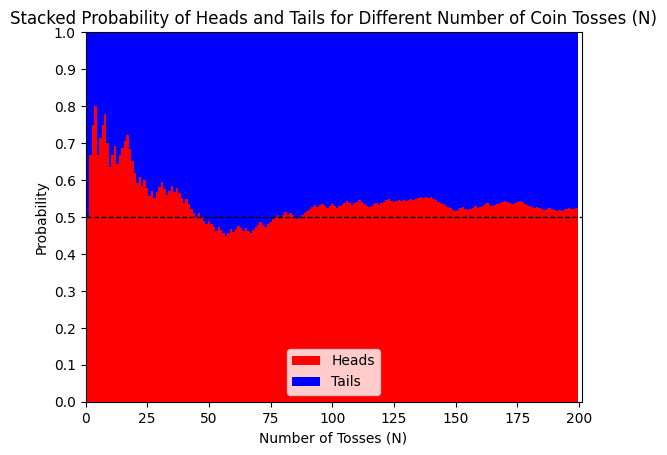

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate a series of coin tosses using numpy random.choice
def coin_tosses(num_tosses):
    # Simulate tosses: 'H' for Heads, 'T' for Tails
    return np.random.choice(['H', 'T'], size=num_tosses)

# Function to calculate the count of Heads and Tails as a function of N tosses
def simulate_coin_tosses(num_tosses):
    tosses = coin_tosses(num_tosses)
    heads_count = np.cumsum(tosses == 'H')  # Cumulative count of 'H' (Heads)
    tails_count = np.cumsum(tosses == 'T')  # Cumulative count of 'T' (Tails)

    heads_probabilities = heads_count / np.arange(1, num_tosses + 1)
    tails_probabilities = tails_count / np.arange(1, num_tosses + 1)
    
    return heads_probabilities, tails_probabilities

toss_counts = 200

# Get the probability of Heads and Tails for each N
heads_probabilities, tails_probabilities = simulate_coin_tosses(toss_counts)

# Plot the stacked bar graph for the probabilities of Heads and Tails for each N
bar_width = 1
index = np.arange(toss_counts)
plt.bar(index, heads_probabilities, bar_width, label='Heads', color='red')
plt.bar(index, tails_probabilities, bar_width, bottom=heads_probabilities, label='Tails', color='blue')

# Customizing the graph
plt.xlim(0,toss_counts+1)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.title("Stacked Probability of Heads and Tails for Different Number of Coin Tosses (N)")
plt.xlabel("Number of Tosses (N)")
plt.ylabel("Probability")
plt.legend()
plt.show()

## **Laws of Probability**


![laws-of-probability.png](media/laws-of-probability.png)

### **1. Complement Rule**  
The **Complement Law** states that the probability of an event **not occurring** is:  

$$
P(A^c) = 1 - P(A)
$$

where:  
- $ P(A) $ is the probability of event $ A $ occurring.  
- $ P(A^c) $ is the probability of event $ A $ **not occurring**.  

---


### **2. Addition Rule**
- If $ A $ and $ B $ are two events, the probability of either occurring is:
  $$
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
  $$
- If $ A $ and $ B $ are mutually exclusive (no overlap), then:
  $$
  P(A \cup B) = P(A) + P(B)
  $$

---

### **3. Multiplication Rule**
- If $ A $ and $ B $ are independent events:
  $$
  P(A \cap B) = P(A) P(B)
  $$
- If they are dependent:
  $$
  P(A \cap B) = P(A) P(B | A)
  $$
  where $ P(B | A) $ is the conditional probability of $ B $ given $ A $.

---

### **4. Bayes’ Theorem**
- Used for updating probabilities when new evidence is introduced:
  $$
  P(A | B) = \frac{P(B | A) P(A)}{P(B)}
  $$
- Example: Medical testing (probability of having a disease given a positive test result).


## **Important Probability Distributions**

![distributions.png](media/distributions.png)

### **1. Uniform Distribution**
- A distribution where all outcomes are equally likely.
- If $ X $ follows a uniform distribution between $ a $ and $ b $, it is denoted as:
  $$
  X \sim U(a, b)
  $$
- **Probability Density Function (PDF)**:
  $$
  f(x) = \frac{1}{b - a}, \quad a \leq x \leq b
  $$
- Example: Rolling a fair die (each face has equal probability of 1/6).

---

### **2. Normal (Gaussian) Distribution**
- A bell-shaped curve commonly found in real-world data.
- Denoted as:
  $$
  X \sim N(\mu, \sigma^2)
  $$
  where $ \mu $ is the mean and $ \sigma^2 $ is the variance.
- **Probability Density Function (PDF)**:
  $$
  f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
  $$
- Example: Heights of people, IQ scores.

---

### **3. Binomial Distribution**
- Models the number of successes in $ n $ independent trials.
- Denoted as:
  $$
  X \sim B(n, p)
  $$
  where $ p $ is the probability of success in each trial.
- **Probability Mass Function (PMF)**:
  $$
  P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
  $$
- Example: Tossing a fair coin $ n $ times and counting the number of heads.

---

### **4. Poisson Distribution**
- Models the number of events in a fixed time/space interval when they occur independently.
- Denoted as:
  $$
  X \sim \text{Poisson}(\lambda)
  $$
  where $ \lambda $ is the average number of events per interval.
- **Probability Mass Function (PMF)**:
  $$
  P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
  $$
- Example: Number of emails received per hour.

References:

By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713